In [30]:
import pandas_datareader.data as web
from fbprophet import Prophet
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

###########
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')
plt.rcParams["axes.unicode_minus"]=False

In [31]:
from pandas_datareader import data
import datetime
from datetime import datetime

In [68]:
start_date="2010-1-1"
end_date="2017-12-31"
ytn=data.get_data_yahoo("040300.KQ",start_date,end_date)
ytn.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-21,2115.0,2050.0,2115.0,2050.0,40115.0,2050.0
2017-12-22,2080.0,2040.0,2065.0,2040.0,13713.0,2040.0
2017-12-26,2065.0,2035.0,2040.0,2050.0,9398.0,2050.0
2017-12-27,2070.0,2010.0,2055.0,2045.0,30842.0,2045.0
2017-12-28,2125.0,2030.0,2050.0,2095.0,23311.0,2095.0


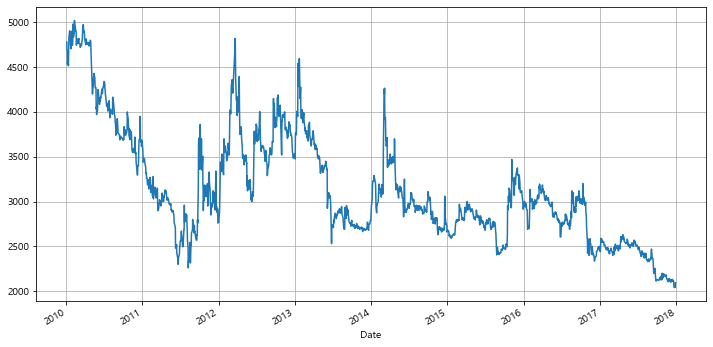

In [69]:
ytn["Close"].plot(figsize=(12,6),grid=True)

In [70]:
df=pd.DataFrame({"ds":ytn.index,"y":ytn["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-01-04,4780.0
1,2010-01-05,4685.0
2,2010-01-06,4680.0
3,2010-01-07,4530.0
4,2010-01-08,4560.0


In [71]:
m=Prophet(daily_seasonality=True,yearly_seasonality = True)
m.fit(df);

In [74]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
2333,2018-12-24
2334,2018-12-25
2335,2018-12-26
2336,2018-12-27
2337,2018-12-28


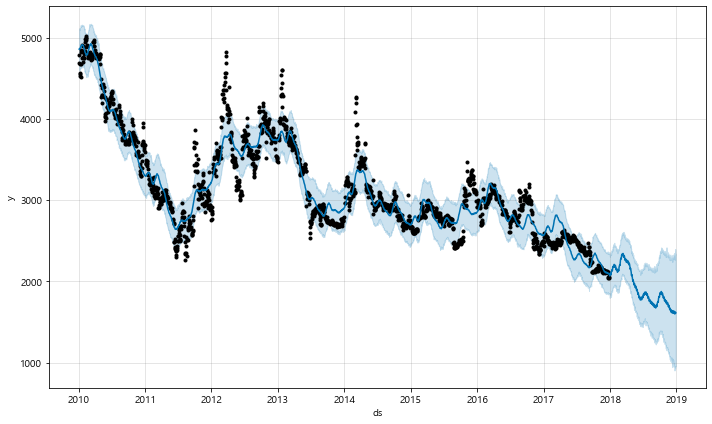

In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
m.plot(forecast);

In [76]:
future=m.make_future_dataframe(periods=700)
future.tail()

,ds
2668,2019-11-24
2669,2019-11-25
2670,2019-11-26
2671,2019-11-27
2672,2019-11-28


In [77]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
2670,2019-11-26,1200.347490,-759.065751,3098.025127
2671,2019-11-27,1194.053768,-832.557746,3119.466352
2672,2019-11-28,1182.047311,-746.744555,3103.959191


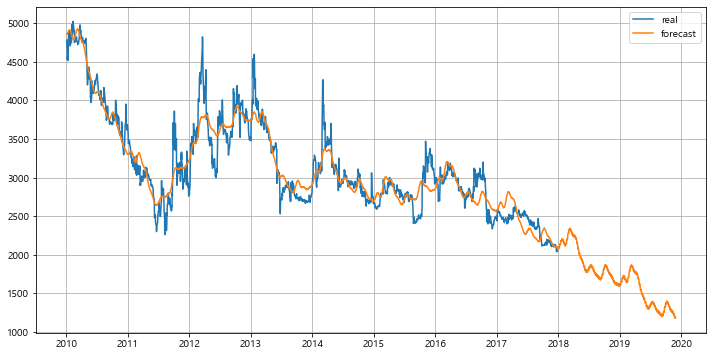

In [78]:
plt.figure(figsize=(12,6))
plt.plot(ytn.index,ytn["Close"],label="real")
plt.plot(forecast["ds"],forecast["yhat"],label="forecast")
plt.grid()
plt.legend()
plt.show()

In [79]:
data = pd.read_excel('../data/science_2012.xlsx')
data

,등록일,발행호,분류,콘텐트타입,조회수
0,2012-01-02,1512,FUSION,일반,13613
1,2012-01-02,1513,FOCUS,일반,67983
2,2012-01-09,1517,FUNNY,만화,9613
3,2012-01-09,1518,FUSION,인물,7257
4,2012-01-16,1522,FUNNY,실험,4333
...,...,...,...,...,...
100,2012-12-17,1759,FOCUS,일반,4472
101,2012-12-19,1763,FUSION,일반,20005
102,2012-12-24,1764,FOCUS,일반,8104
103,2012-12-26,1768,FUNNY,실험,6142


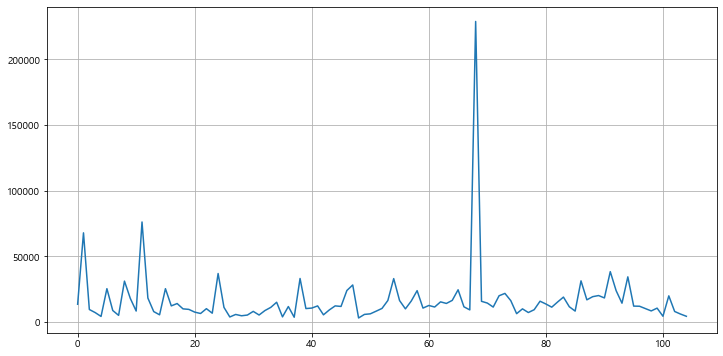

In [80]:
data.조회수.plot(figsize=(12,6),grid=True)

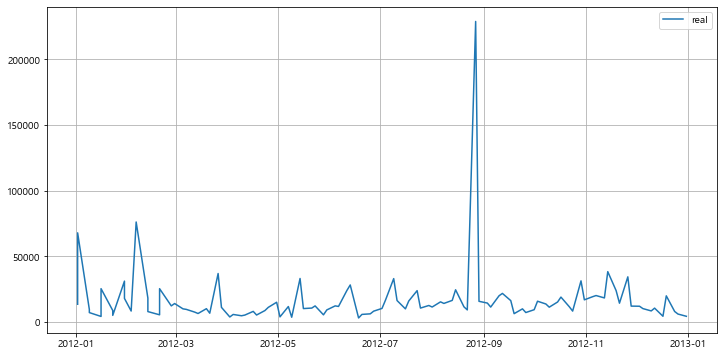

In [81]:
plt.figure(figsize=(12,6))
plt.plot(data["등록일"],data["조회수"],label="real")
plt.grid()
plt.legend()
plt.show()

In [82]:
data_1=data[["등록일","조회수"]]
data_1

,등록일,조회수
0,2012-01-02,13613
1,2012-01-02,67983
2,2012-01-09,9613
3,2012-01-09,7257
4,2012-01-16,4333
...,...,...
100,2012-12-17,4472
101,2012-12-19,20005
102,2012-12-24,8104
103,2012-12-26,6142


In [83]:
data_1.rename(columns={"등록일":"ds",
             "조회수":"y"}, inplace=True)
data_1

,ds,y
0,2012-01-02,13613
1,2012-01-02,67983
2,2012-01-09,9613
3,2012-01-09,7257
4,2012-01-16,4333
...,...,...
100,2012-12-17,4472
101,2012-12-19,20005
102,2012-12-24,8104
103,2012-12-26,6142


In [84]:
m=Prophet(daily_seasonality=True,yearly_seasonality = True)
m.fit(data_1);

In [85]:
future=m.make_future_dataframe(periods=60)
future.tail()

,ds
160,2013-02-25
161,2013-02-26
162,2013-02-27
163,2013-02-28
164,2013-03-01


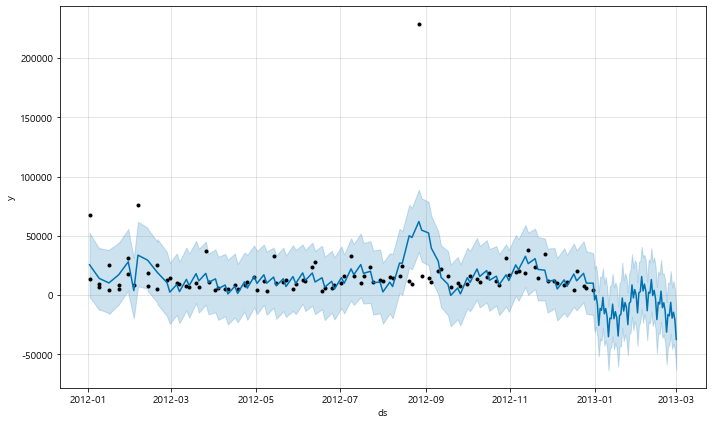

In [86]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)
m.plot(forecast);

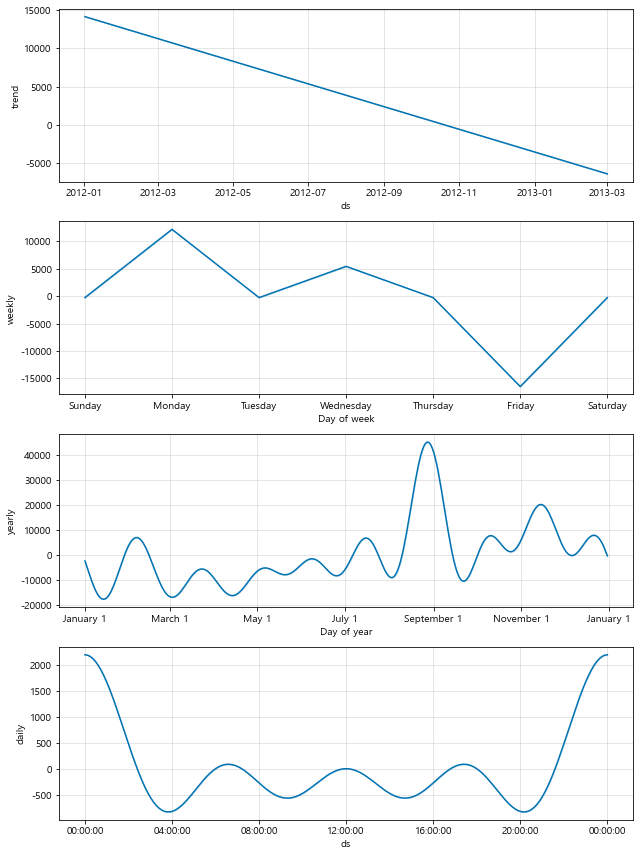

In [87]:
forecast=m.predict(future)
m.plot_components(forecast);